In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

 **One Hot Encoding the Target Classes**

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [8]:

data = []
paths = []
result = []

for r, d, f in os.walk(r'/kaggle/input/brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [9]:
paths = []
for r, d, f in os.walk(r"/kaggle/input/brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [10]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [24]:
result = np.array(result)
result = result.reshape(2891,2)

**Splitting the Data into Training & Testing**

In [25]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

**Model Building**

In [26]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [18]:

y_train.shape

(2312, 1, 2)

In [27]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
58/58 [==============================] - 112s 2s/step - loss: 4.5937 - val_loss: 1.4565
Epoch 2/30
58/58 [==============================] - 109s 2s/step - loss: 0.4123 - val_loss: 0.2896
Epoch 3/30
58/58 [==============================] - 109s 2s/step - loss: 0.1828 - val_loss: 0.2402
Epoch 4/30
58/58 [==============================] - 108s 2s/step - loss: 0.1290 - val_loss: 0.2463
Epoch 5/30
58/58 [==============================] - 109s 2s/step - loss: 0.0834 - val_loss: 0.2950
Epoch 6/30
58/58 [==============================] - 108s 2s/step - loss: 0.0644 - val_loss: 0.3283
Epoch 7/30
58/58 [==============================] - 108s 2s/step - loss: 0.0426 - val_loss: 0.3349
Epoch 8/30
58/58 [==============================] - 109s 2s/step - loss: 0.0402 - val_loss: 0.3747
Epoch 9/30
58/58 [==============================] - 109s 2s/step - loss: 0.0334 - val_loss: 0.3425
Epoch 10/30
58/58 [==============================] - 110s 2s/step - loss: 0.0291 - val_loss: 0.3333
Epoch 11/

**Plotting Losses**

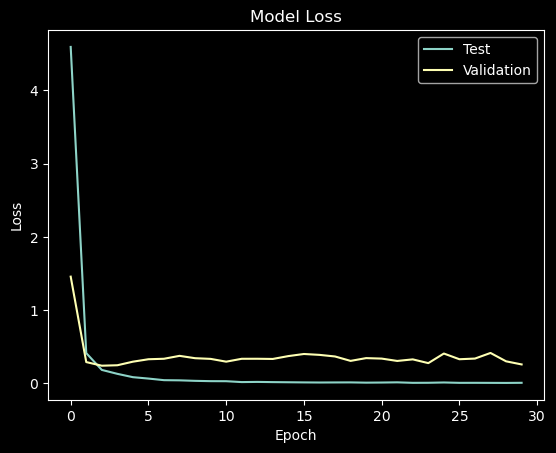

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

**Checking the Model**

In [29]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


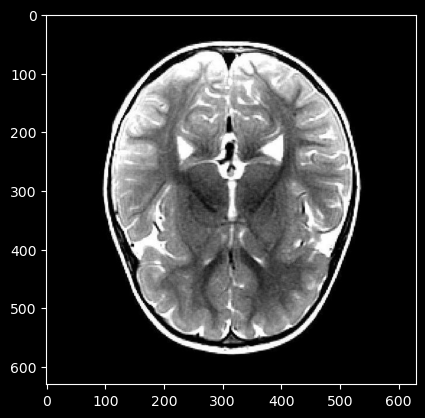

In [30]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-detection/no/no1013.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99998807907104% Confidence This Is Its a Tumor


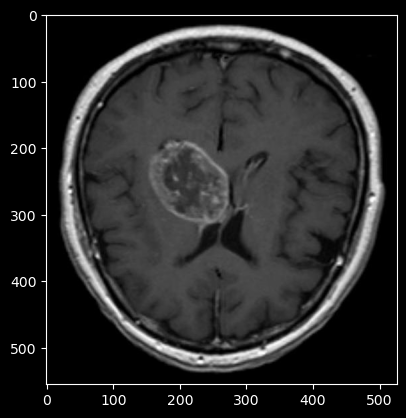

In [31]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-detection/yes/y102.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

**Predecting the new data**

100.0% Confidence This Is No, Its not a tumor


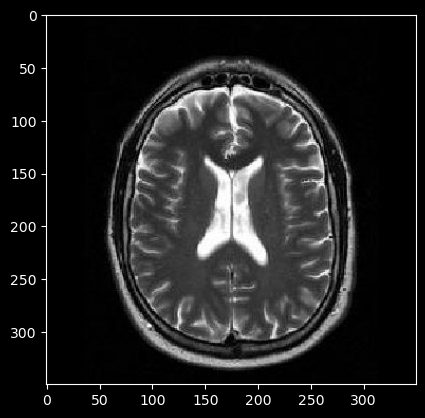

In [32]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-detection/pred/pred12.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.83614087104797% Confidence This Is Its a Tumor


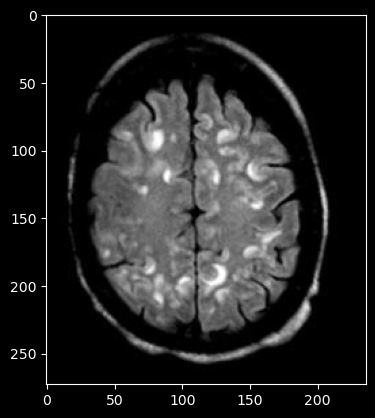

In [36]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-detection/pred/pred25.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))